# **OVERVIEW**
Trong phần này, chúng ta sẽ quay lại với cấu trúc dữ liệu `Heap` đã đề cập ở chương trước.  
Một trong những ứng dụng nổi bật và quan trọng nhất của `Heap` chính là thuật toán sắp xếp **`Heap Sort`** – một phương pháp sắp xếp hiệu quả dựa trên đặc tính của cấu trúc `Heap`.

[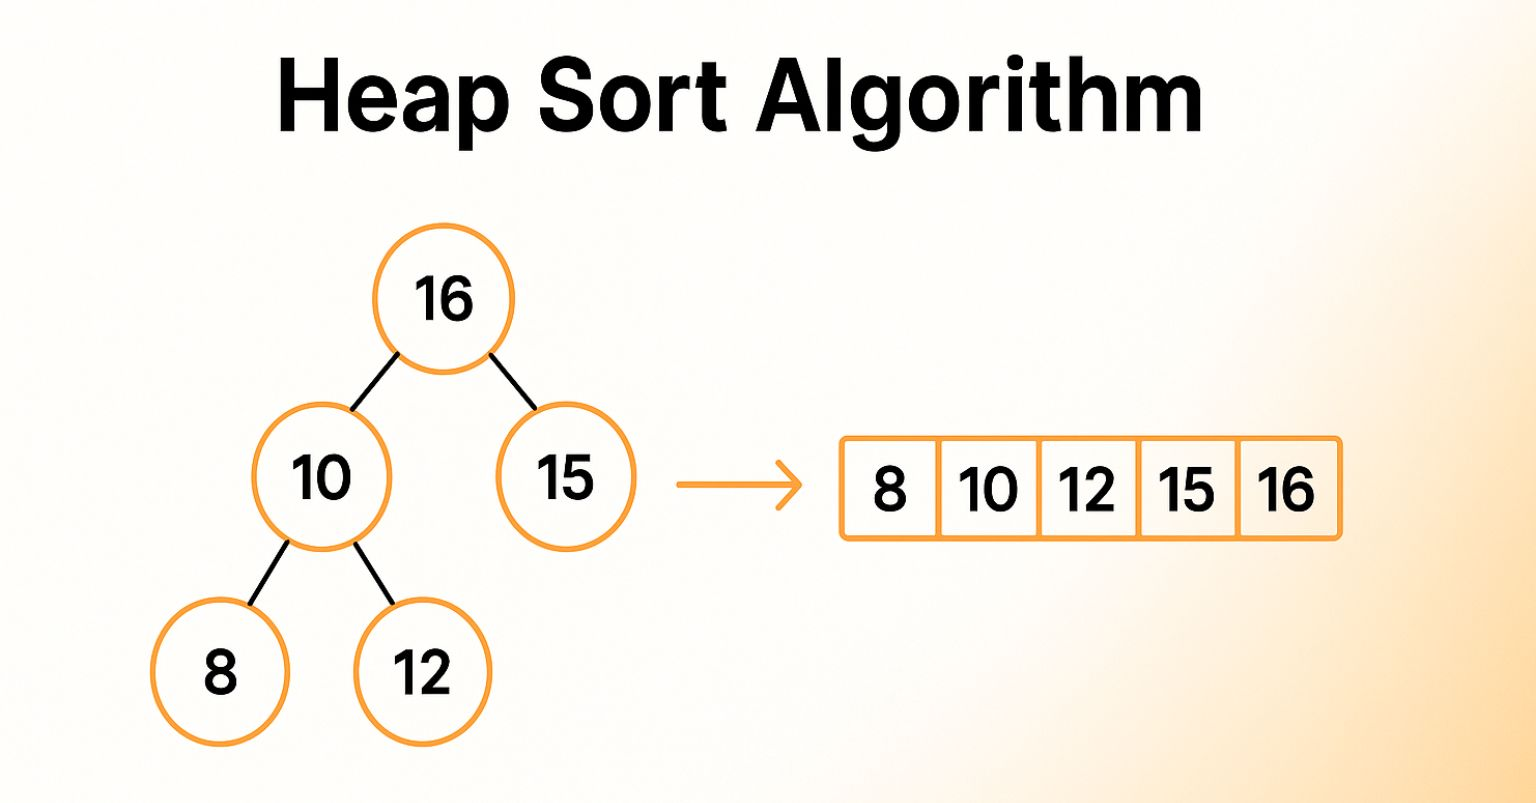](https://www.youtube.com/watch?v=2DmK_H7IdTo)

# **Ý TƯỞNG**

Về mặt ý tưởng, chúng ta sẽ tận dụng cấu trúc dữ liệu `Heap` để thực hiện việc `sắp xếp`.

Tùy vào mục đích sắp xếp tăng hay giảm, ta có thể dùng `min-heap` hoặc `max-heap`.

**Độ phức tạp:** O(nlogn)

**Cụ thể: sắp xếp tăng**

## **In-Place**

1. Xây dựng `max-heap` tử mảng ban đầu.
2. Phần tử lớn nhất sẽ nằm ở đầu → hoán đổi nó với phần tử cuối cùng.
3. Giảm kích thước heap (`n = n - 1`) và thực hiện `heapify-down` để giữ đúng cấu trúc `max-heap`.
4. Lặp lại **BƯỚC 2** cho đến khi chỉ còn 1 phần tử.

##  **Modified**

1. Xây dựng `min-heap` từ mảng ban đầu.
2. Lấy phần tử nhỏ nhất (ở đầu heap) và đưa vào `sorted_arr`.
3. Thực hiện lại `heapify` để duy trì tính chất `min-heap`.
4. Lặp lại **BƯỚC 2** cho đến khi `heap` không còn phần tử nào.


**Ví dụ: In-Place**

```python
 arr = [4, 10, 3, 5, 1]
```

```python
 Xây dựng max-heap


        10
      /  \
     5    3
    / \
   4   1
                       ↓ n
 → arr = [10, 5, 3, 4, 1]

```

```python
 swap giá trị đầu và cuối


       10
      /  \
     5    3
    / \
   4   1


       ↓

       1
      /  \
     5    3
    / \
   4   10
        
                       ↓ n
 → arr = [1, 5, 3, 4, 10]
```

```python
 giảm n = n - 1 và heaptify-down


        1
      /  \
     5    3             
    / \
   4   10

       ↓

       5
      /  \
     4    3
    /
   1  
                   ↓ n
 → arr = [5, 4, 3, 1, 10]
```

```python
 swap giá trị đầu và cuối

       5
      /  \
     4    3
    /
   1  

       ↓
       
        1
      /  \
     4    3
    /
   5     
                   ↓ n
 → arr = [1, 4, 3, 5, 10]
```

```python
 giảm n = n - 1 và heaptify-down


        1
      /  \
     4    3
    /
   5  

       ↓

       4
      /  \
     1    3
  
                ↓ n
 → arr = [4, 1, 3, 5, 10]
```


```python
 swap giá trị đầu và cuối

       4
      /  \
     1    3

       ↓

       3
      /  \
     1    4

                ↓ n
 → arr = [3, 1, 4, 5, 10]
```

```python
 giảm n = n - 1 và heaptify-down

       3
      /  \
     1    4

       ↓

       3
      /  
     1    
  
             ↓ n
 → arr = [3, 1, 4, 5, 10]
```


```python
 swap giá trị đầu và cuối

       3
      /  
     1  

       ↓

       1
      /  
     3  
             ↓ n
 → arr = [1, 3, 4, 5, 10]
 ```
```python
 giảm n = n - 1 và heaptify-down

       1
      /  
     3

       ↓

       1
     
  
          ↓ n
 → arr = [1, 3, 4, 5, 10]

 n == 1, kết thúc và ta được mảng sắp xếp tăng dần arr = [1, 3, 4, 5, 10]
```


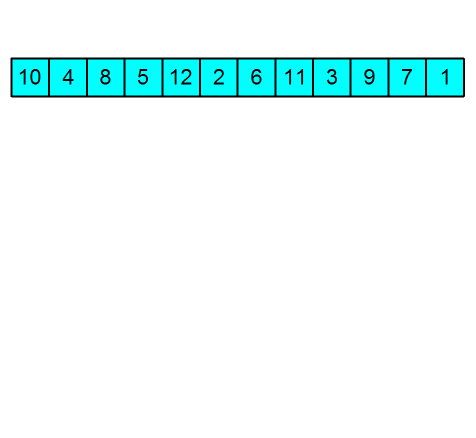

# **CODE**
Phần này tôi sẽ tiến hành code lại thuật toán `Heap Sort` bằng ngôn ngữ `Python` 😤😤😤

## **In-Place**

In [ ]:
# Heaptify
def heaptify(arr: list, parent_index: int, length:int):
  # Tìm vị trí con trái và con phải
  left_child = parent_index * 2 + 1
  right_child = parent_index * 2 + 2
  largest_index = parent_index

  # Tiến hành tìm số nào lớn hơn
  if left_child < length and arr[left_child] > arr[largest_index]:
    largest_index = left_child

  if right_child < length and arr[right_child] > arr[largest_index]:
    largest_index = right_child

  # Nếu node cha là số lớn nhất thì hợp lệ không cần heaptify nữa
  if largest_index != parent_index:
    arr[largest_index], arr[parent_index] = arr[parent_index], arr[largest_index]
    heaptify(arr, largest_index, length)

  return

def heap_sort(arr) -> list:
 # Bước 1 tạo max-heap
 n = len(arr)
 # Chỉ xét các đỉnh cha
 for i in range(n // 2, -1 , -1):
   heaptify(arr, i, n)

 # Bước 2 thực hiện heap sort
 while n > 1:
  arr[0], arr[n - 1] = arr[n -1], arr[0]
  n -= 1
  # heaptify để đảm bảo cấu trúc max-heap
  heaptify(arr, 0, n)

 return arr

# Tạo mảng
arr = [4, 10, 3, 5, 1]
# Tiến hành heap sort
sorted_array = heap_sort(arr)

print(f"**Mảng sau khi sắp xếp: {sorted_array}")

**Mảng sau khi sắp xếp: [1, 3, 4, 5, 10]


## **Modified**

In [ ]:
# Heaptify
def heaptify(arr: list, parent_index: int, length:int):
  # Tìm vị trí con trái và con phải
  left_child = parent_index * 2 + 1
  right_child = parent_index * 2 + 2
  small_index = parent_index

  # Tiến hành tìm số nào lớn hơn
  if left_child < length and arr[left_child] < arr[small_index]:
    small_index = left_child

  if right_child < length and arr[right_child] < arr[small_index]:
    small_index = right_child

  # Nếu node cha là số bé nhất thì hợp lệ không cần heaptify nữa
  if small_index != parent_index:
    arr[small_index], arr[parent_index] = arr[parent_index], arr[small_index]
    heaptify(arr, small_index, length)

  return

def min_heap(arr: list) -> list:
 # Tạo min-heap
 n = len(arr)

 # Chỉ xét các đỉnh cha
 for i in range(n // 2, -1 , -1):
   heaptify(arr, i, n)

 return arr

def heap_sort(arr: list) -> list:
 # Bước 1 tạo min-heap
 arr = min_heap(arr)

 sorted_array = []
 # Bước 2 thực hiện heap sort
 while len(arr) > 0:
  # Lấy phần tử đầu ra và gán vào sorted_array
  sorted_array.append(arr[0])

  # Pop nó ra khỏi mảng gốc
  arr.pop(0)

  # Xây dựng lại cây min-heap
  arr = min_heap(arr)

 return sorted_array

# Tạo mảng
arr = [4, 10, 3, 5, 1]

# Tiến hành heap sort
sorted_array = heap_sort(arr)

print(f"**Mảng sau khi sắp xếp: {sorted_array}")

**Mảng sau khi sắp xếp: [1, 3, 4, 5, 10]


# **TADA HẾT RỒI !!! 🥳🥳🥳🥳**

Cảm ơn các bạn đã đọc hết bài `notebook` này, mong các bạn góp ý và ủng hộ mình trong các bài `notebook` sau nhé 😌😌😌